In [64]:

#import libraries
import pandas as pd
import requests
import tweepy
import json
import re
from datetime import datetime
import time
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#read the twitter archive file
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [66]:
#import the tweet image using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#read the image predictions file
image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [67]:
# get your consumer key, consumer secret ,access token and access secret from twitter to get WeRAteDogs dataset
consumer_key = '66l0AJKmqaKg7cDsMgSR5QrfF'
consumer_secret = '6RnUfTVRhTrWYA7tKRP87568FK2NKAzrdAWIIV7JuRxH8MqY6K'
access_token = '979682502-LRBo6LA5UwQcWS88lVfzSdInvsUpGqGUMV8GY4lq'
access_secret = '291DfEnBA56pHZllbOkY6uFzq8hhWktIhFxHGz1o9s4kS'


In [68]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key,consumer_secret) 
auth.set_access_token(access_token,access_secret)
api = tweepy.API(auth)

In [69]:
#add tweets to tweet_json.txt
with open('tweet_json.txt','a') as file:
    for every_tweet in twitter_df.tweet_id:
        try:
            tweet = api.get_status(every_tweet , tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

In [70]:
#make an empty list
#load the json material in tweet_json.txt

tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [71]:
#create the json_tweets data frame
json_tweets = pd.DataFrame()

In [72]:
#add the necessary columns to the data frame
json_tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
json_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
json_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess


##### Look at twitter dataset 

In [73]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [74]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [75]:
# Check for duplicated tweets
twitter_df.tweet_id.duplicated().sum()

0

In [76]:
#check the number of sources in twitter archive
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [77]:
# Check for retweets
twitter_df[twitter_df.retweeted_status_id.notnull()].retweeted_status_id.count()

181

In [78]:
# Check answers to tweets
twitter_df[twitter_df.in_reply_to_status_id.notnull()].in_reply_to_status_id.count()

78

In [79]:
# See individual value count in name column
twitter_df.name.value_counts() 

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Toby            7
Bailey          7
Buddy           7
an              7
Daisy           7
Stanley         6
Bella           6
Milo            6
Leo             6
Dave            6
Oscar           6
Jax             6
Rusty           6
Koda            6
Jack            6
Scout           6
Chester         5
             ... 
Divine          1
Jed             1
Dobby           1
Obi             1
Bobby           1
Staniel         1
Cermet          1
Julio           1
Furzey          1
Beebop          1
Duchess         1
Dale            1
Aqua            1
Dietrich        1
Lugan           1
incredibly      1
Duddles         1
Jeffri          1
Oddie           1
Covach          1
Jessifer        1
Dido            1
Chloe           1
Stuart          1
Maude     

In [80]:
#sort names
twitter_df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [81]:
# Check values on the column doggo
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [82]:
# Check values on the column floofer
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [83]:
# Check values on the column pupper
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [84]:
# Check values on the column puppo
twitter_df.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

##### Look at Json


In [85]:
#display the json tweets data frame
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,8188,37541
1,892177421306343426,6058,32273
2,891815181378084864,4008,24312
3,891689557279858688,8343,40886
4,891327558926688256,9037,39084
5,891087950875897856,3002,19660
6,890971913173991426,1985,11488
7,890729181411237888,18191,63345
8,890609185150312448,4120,27022
9,890240255349198849,7111,30970


In [86]:
#display info for json_tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 3 columns):
id                6182 non-null int64
retweet_count     6182 non-null int64
favorite_count    6182 non-null int64
dtypes: int64(3)
memory usage: 145.0 KB


In [87]:
#display head for json_tweets
json_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8188,37541
1,892177421306343426,6058,32273
2,891815181378084864,4008,24312
3,891689557279858688,8343,40886
4,891327558926688256,9037,39084


In [88]:
#display statistics for json_tweets
json_tweets.describe()

,id,retweet_count,favorite_count
count,6.182000e+03,6182.000000,6182.000000
mean,8.199644e+17,5043.453737,14334.296182
std,3.695032e+16,5675.109330,15069.889884
min,7.123094e+17,1.000000,0.000000
25%,7.892808e+17,2083.000000,5423.250000
50%,8.185365e+17,3443.000000,10965.500000
75%,8.482137e+17,5898.750000,20223.000000
max,8.924206e+17,60151.000000,138514.000000


##### image dataset

In [89]:
#display info for image predictions data frame
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [90]:
#display statistics for images predictions
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [91]:
# Check dataset content
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [92]:
# Check the number of images with multiple breed predictions
image[~image.p1_dog & ~image.p2_dog & ~image.p3_dog].tweet_id.count()


324

In [93]:
#check the number of images
image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [94]:
#check for duplicate tweet_ids in the image dataframe
sum(image.tweet_id.duplicated())

0

## Quality

#### twitter_df dataset
    - There are 181 retweets.
    - There are 78 response tweets.
    - Timestamp column is a string instead of Datetime.
    - Missing dog names (replaced with 'None')
    - Incorrect dog names
    - json_tweets has column name id. 


    

##### image
    -For columns p1, p2 & p3. The breed names are lower case.
    -Breeds named '_'.
    -Invalid data type for breed columns.


## Tidiness

     - Join all 3 dataframes.
     - Dog stages should be a single column rather than four
     

## Clean

In [95]:
#Keeping the original dataset. Making a copy of the datasets.
twitter_clean = twitter_df.copy()
image_clean = image.copy()
json_clean = json_tweets.copy()




##### Quality 
    twitter_df: there are 181 retweets. 

##### Define
    Delete all retweet rows.

##### Code

In [96]:
twitter_clean.drop(twitter_clean.index[twitter_clean.retweeted_status_id.notnull()], inplace=True)

##### Test

In [97]:
twitter_clean[twitter_clean.retweeted_status_id.notnull()].retweeted_status_id.count()


0

##### Quality
twitter_df: There are 78 response tweets.



##### Define
    Delete all rows that are response tweets.




##### Code

In [98]:
twitter_clean.drop(twitter_clean.index[twitter_clean.in_reply_to_status_id.notnull()], inplace=True)

##### Test

In [99]:
twitter_clean[twitter_clean.in_reply_to_status_id.notnull()].in_reply_to_status_id.count()


0

##### Quality
       twitter_df: Timestamp column is a string instead of Datetime.

##### Define
    Convert timestamp from object to datetime.

##### Code


In [100]:
twitter_clean.timestamp = twitter_clean.timestamp.str[:-6].astype('datetime64[ns]')


##### Test

In [101]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

##### Quality
    twitter_df: Missing dog names (replaced with 'None')
    
##### Define
    Remove the lines that have dog name as 'None'.



##### Code

In [102]:
twitter_clean = twitter_clean[twitter_clean.name != "None"]


##### Test

In [103]:
sum(twitter_clean.name == "None")


0

##### Quality
    twitter_df: Incorrect dog names

##### Define

    Remove the lines that have incorrect dog names.

##### Code

In [104]:
lowercase = []

for word in twitter_clean['name']:
    if word.islower():
         lowercase.append(word)
            
Counter(lowercase)

Counter({'such': 1,
         'a': 55,
         'quite': 3,
         'not': 2,
         'one': 4,
         'incredibly': 1,
         'very': 4,
         'my': 1,
         'his': 1,
         'an': 6,
         'actually': 2,
         'just': 3,
         'getting': 2,
         'mad': 1,
         'this': 1,
         'unacceptable': 1,
         'all': 1,
         'old': 1,
         'infuriating': 1,
         'the': 8,
         'by': 1,
         'officially': 1,
         'life': 1,
         'light': 1,
         'space': 1})

In [105]:
twitter_clean = twitter_clean[twitter_clean.name.map(lambda word: word.istitle())]


##### Test

In [106]:
#check if any lowercase letter names left
lowercase2 = []

for word in twitter_clean['name']:
    if word.islower():
         lowercase2.append(word)
            
Counter(lowercase2)

Counter()

##### Quality
    json_tweets: Has Invalid column name id.
##### Define
    rename id column of tweet_json to tweet_id¶


##### Code

In [107]:
json_clean = json_clean.rename(columns = {'id':'tweet_id'})

##### Test

In [108]:
json_clean.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8188,37541
1,892177421306343426,6058,32273
2,891815181378084864,4008,24312
3,891689557279858688,8343,40886
4,891327558926688256,9037,39084


##### Quality
    image: For columns p1, p2 & p3. The breed names are lower case.

##### Define
    Make the first letter uppercase.

##### Code

In [109]:
image_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [110]:
image_clean['p1'] = image_clean.p1.str.title()
image_clean['p2'] = image_clean.p2.str.title()
image_clean['p3'] = image_clean.p3.str.title()

##### Test

In [111]:
image_clean.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###### Quality
    image: Breed named as '_'.

###### Define
    Replace '_' with space in breed column.

##### Code

In [112]:

image_clean.p1 = image_clean.p1.str.replace('_', ' ')
image_clean.p2 = image_clean.p2.str.replace('_', ' ')
image_clean.p3 = image_clean.p3.str.replace('_', ' ')

##### Test

In [113]:
image_clean.p1.str.contains('_').value_counts()

False    2075
Name: p1, dtype: int64

In [114]:
image_clean.p2.str.contains('_').value_counts()

False    2075
Name: p2, dtype: int64

In [115]:
image_clean.p3.str.contains('_').value_counts()

False    2075
Name: p3, dtype: int64

##### Quality
    image: Invalid data type for breed columns.

##### Define
    Convert breed columns from object to categorical.

##### Code

In [116]:
image_clean.p1 = image_clean.p1.astype('category')
image_clean.p2 = image_clean.p2.astype('category')
image_clean.p3 = image_clean.p3.astype('category')

##### Test

In [117]:
image_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


## Tidiness

##### Quality
    Dog stages is split into four different columns.
##### Define
    Create dog stages with a single variable.

##### Code

In [118]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [119]:
twitter_clean = pd.melt(twitter_clean, id_vars = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], var_name = 'dog', value_name = 'dog_stage')


In [120]:

twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,in_reply_to_status_id,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,in_reply_to_status_id,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,in_reply_to_status_id,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,in_reply_to_status_id,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,in_reply_to_status_id,NaN


In [121]:
#drop the dog column
twitter_clean = twitter_clean.drop('dog', axis = 1)

##### Test

In [122]:

#check the changes
twitter_clean.head(10)


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
6,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
7,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,NaN
8,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN
9,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN


##### Quality
    Join all 3 dataframes
##### Define
    join twitter_clean , image_clean and json_clean

In [124]:
# merge twitter_clean with image_clean
twitter_clean = pd.merge(left=twitter_clean, right=image_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [125]:
#merge twitter_clean with json_clean
twitter_clean = pd.merge(left = twitter_clean, right = json_clean, left_on = 'tweet_id', right_on = 'tweet_id',how = 'inner')

##### Test

In [126]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37030 entries, 0 to 37029
Data columns (total 21 columns):
tweet_id              37030 non-null int64
timestamp             37030 non-null datetime64[ns]
text                  37030 non-null object
expanded_urls         37030 non-null object
rating_numerator      37030 non-null int64
rating_denominator    37030 non-null int64
name                  37030 non-null object
dog_stage             18515 non-null object
jpg_url               37030 non-null object
img_num               37030 non-null int64
p1                    37030 non-null category
p1_conf               37030 non-null float64
p1_dog                37030 non-null bool
p2                    37030 non-null category
p2_conf               37030 non-null float64
p2_dog                37030 non-null bool
p3                    37030 non-null category
p3_conf               37030 non-null float64
p3_dog                37030 non-null bool
retweet_count         37030 non-null int64
favor

In [127]:
#store file
twitter_clean.to_csv('twitter_archive_master.csv',index = False , encoding = 'utf-8')

## Insights

In [128]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,3.703000e+04,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000,3.703000e+04,37030.000000,37030.000000
mean,8.202772e+17,12.143667,9.994329,1.340265,0.634759,0.138676,5.881695e-02,4558.100189,17373.244937
std,3.805989e+16,3.094974,0.130313,0.725918,0.256078,0.103979,5.307889e-02,4947.793527,13787.677418
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,463.000000,2841.000000
25%,7.878106e+17,11.000000,10.000000,1.000000,0.423150,0.051928,1.201160e-02,2159.000000,8967.000000
50%,8.185365e+17,12.000000,10.000000,1.000000,0.657967,0.122978,4.526270e-02,3271.000000,13304.000000
75%,8.490519e+17,13.000000,10.000000,1.000000,0.874566,0.199482,9.411200e-02,5068.000000,21697.000000
max,8.924206e+17,75.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,60151.000000,125339.000000


In [129]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37030 entries, 0 to 37029
Data columns (total 21 columns):
tweet_id              37030 non-null int64
timestamp             37030 non-null datetime64[ns]
text                  37030 non-null object
expanded_urls         37030 non-null object
rating_numerator      37030 non-null int64
rating_denominator    37030 non-null int64
name                  37030 non-null object
dog_stage             18515 non-null object
jpg_url               37030 non-null object
img_num               37030 non-null int64
p1                    37030 non-null category
p1_conf               37030 non-null float64
p1_dog                37030 non-null bool
p2                    37030 non-null category
p2_conf               37030 non-null float64
p2_dog                37030 non-null bool
p3                    37030 non-null category
p3_conf               37030 non-null float64
p3_dog                37030 non-null bool
retweet_count         37030 non-null int64
favor

In [130]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8188,37541
1,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8188,37549
2,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8188,37549
3,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8188,37550
4,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8188,37550


In [131]:
#check for duplicate value
sum(twitter_clean.duplicated())

29617

In [132]:
#drop duplicates
twitter_clean = twitter_clean.drop_duplicates()

In [134]:
#confirm duplicates removed
sum(twitter_clean.duplicated())


0

In [135]:
#check info
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7413 entries, 0 to 37007
Data columns (total 21 columns):
tweet_id              7413 non-null int64
timestamp             7413 non-null datetime64[ns]
text                  7413 non-null object
expanded_urls         7413 non-null object
rating_numerator      7413 non-null int64
rating_denominator    7413 non-null int64
name                  7413 non-null object
dog_stage             5057 non-null object
jpg_url               7413 non-null object
img_num               7413 non-null int64
p1                    7413 non-null category
p1_conf               7413 non-null float64
p1_dog                7413 non-null bool
p2                    7413 non-null category
p2_conf               7413 non-null float64
p2_dog                7413 non-null bool
p3                    7413 non-null category
p3_conf               7413 non-null float64
p3_dog                7413 non-null bool
retweet_count         7413 non-null int64
favorite_count        7413

In [139]:
#Find columns with missing values
twitter_clean.columns[twitter_clean.isnull().any()]

Index([], dtype='object')

In [137]:
#drop missing values

columns_list = twitter_clean.columns[twitter_clean.isnull().any()]
twitter_clean.drop(columns_list, axis=1, inplace=True)

In [140]:
#Verify, if missing values are dropped.
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7413 entries, 0 to 37007
Data columns (total 20 columns):
tweet_id              7413 non-null int64
timestamp             7413 non-null datetime64[ns]
text                  7413 non-null object
expanded_urls         7413 non-null object
rating_numerator      7413 non-null int64
rating_denominator    7413 non-null int64
name                  7413 non-null object
jpg_url               7413 non-null object
img_num               7413 non-null int64
p1                    7413 non-null category
p1_conf               7413 non-null float64
p1_dog                7413 non-null bool
p2                    7413 non-null category
p2_conf               7413 non-null float64
p2_dog                7413 non-null bool
p3                    7413 non-null category
p3_conf               7413 non-null float64
p3_dog                7413 non-null bool
retweet_count         7413 non-null int64
favorite_count        7413 non-null int64
dtypes: bool(3), category(3

## Descriptive statistics

In [141]:
twitter_clean.describe()


,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,7.413000e+03,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7.413000e+03,7413.000000,7413.000000
mean,8.220187e+17,12.199379,9.996358,1.354782,0.642375,0.137785,5.709271e-02,5025.608391,18790.509645
std,3.816960e+16,3.159104,0.104475,0.739645,0.254766,0.105113,5.234007e-02,5688.722393,15372.714719
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,463.000000,2841.000000
25%,7.895992e+17,12.000000,10.000000,1.000000,0.437216,0.049562,1.156350e-02,2313.000000,9459.000000
50%,8.207497e+17,12.000000,10.000000,1.000000,0.662660,0.122812,4.261790e-02,3475.000000,15096.000000
75%,8.522261e+17,13.000000,10.000000,1.000000,0.878822,0.199396,9.214290e-02,5571.000000,23001.000000
max,8.924206e+17,75.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,60151.000000,125339.000000


In [142]:
#count the number of ratings 
twitter_clean['rating_numerator'].value_counts()

12    2950
13    2305
11    1375
10     362
14     278
8       28
27      16
75      15
7       15
5       15
6       12
9       12
4       12
3        9
24       9
Name: rating_numerator, dtype: int64

##### The most common rating numerator is 12, followed by 13, 11 and 10. We also have outliers 75, 27, 24.



Text(0.5,1,'Ratings Distribution')

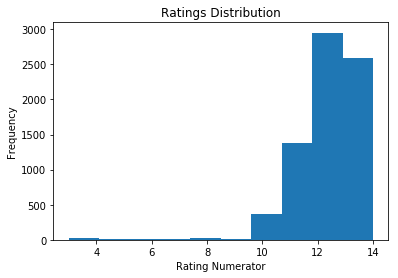

In [143]:
#plot the count of rating numerators between 3 and 14
plt.hist(twitter_clean['rating_numerator'], range = (3, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

##### The plot shows, that the graph is left skewed with a peak at 12.

In [144]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,7.413000e+03,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7.413000e+03,7413.000000,7413.000000
mean,8.220187e+17,12.199379,9.996358,1.354782,0.642375,0.137785,5.709271e-02,5025.608391,18790.509645
std,3.816960e+16,3.159104,0.104475,0.739645,0.254766,0.105113,5.234007e-02,5688.722393,15372.714719
min,7.588547e+17,3.000000,7.000000,1.000000,0.082489,0.000023,5.595040e-07,463.000000,2841.000000
25%,7.895992e+17,12.000000,10.000000,1.000000,0.437216,0.049562,1.156350e-02,2313.000000,9459.000000
50%,8.207497e+17,12.000000,10.000000,1.000000,0.662660,0.122812,4.261790e-02,3475.000000,15096.000000
75%,8.522261e+17,13.000000,10.000000,1.000000,0.878822,0.199396,9.214290e-02,5571.000000,23001.000000
max,8.924206e+17,75.000000,10.000000,4.000000,0.999953,0.467678,2.476190e-01,60151.000000,125339.000000


##### Let's Observe the tweet with maximum number of likes (favorite_count) and retweets (retweet_count).

In [145]:
#highest rated dog
twitter_clean['rating_numerator'].value_counts()

12    2950
13    2305
11    1375
10     362
14     278
8       28
27      16
75      15
7       15
5       15
6       12
9       12
4       12
3        9
24       9
Name: rating_numerator, dtype: int64

In [146]:
#check highest rated dog
twitter_clean[twitter_clean.rating_numerator == 75]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
28070,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6580,19212
28071,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6577,19204
28073,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6577,19205
28075,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6564,19201
28076,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6565,19201
28084,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6580,19212
28085,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6577,19204
28087,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6577,19205
28089,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6564,19201
28090,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian Cat,0.122978,False,Chow,0.102654,True,6565,19201


##### we can see that The highest rated dog is Logan.


In [147]:
#check the lowest rated dog
twitter_clean[twitter_clean.rating_numerator == 3]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
30870,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1764,6693
30875,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1762,6668
30876,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1762,6669
30884,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1764,6693
30889,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1762,6668
30890,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1762,6669
30912,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1764,6693
30917,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1762,6668
30918,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,1762,6669


##### We can see that the lowest rated dog is Wesley.

In [148]:
twitter_clean[twitter_clean.favorite_count == twitter_clean.favorite_count.max()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
22120,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339
22134,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339
22162,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339


In [149]:
twitter_clean[twitter_clean.retweet_count == twitter_clean.retweet_count.max()]


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
22120,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339
22134,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339
22162,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,60151,125339


##### Most liked and Most favorite was the same dog named Stephan.


Text(0,0.5,'Likes')

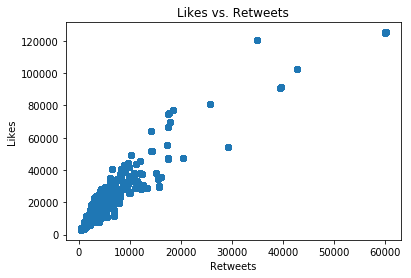

In [150]:

#create scatter plot between retweets and favorites
plt.scatter(twitter_clean['retweet_count'], twitter_clean['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

##### This graph shows strong positive correlation between retweets and Favorites.